In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [85]:
hr = pd.read_csv('HR.csv')
hr_dummies = pd.get_dummies(hr)

train_indices, test_indices = train_test_split(np.array(hr_dummies.index), test_size=0.2, random_state=0)

hr_train = hr_dummies.loc[train_indices].copy()
hr_test = hr_dummies.loc[test_indices].copy() 

In [86]:
x_train = hr_train.drop('left', axis=1)
y_train = hr_train['left']

x_test = hr_test.drop('left', axis=1)
y_test = hr_test['left']

In [87]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=2, min_samples_leaf=5, random_state=0)
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=5,
                       random_state=0)

In [88]:
y_pred = tree.predict(x_test)

f1_score(hr_test['left'], y_pred)

0.6493506493506493

# Random Search

In [89]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [90]:
parameters = {'min_samples_leaf': np.arange(1, 100),
              'max_depth': np.arange(1, 20)}

random_search = RandomizedSearchCV(DecisionTreeClassifier(criterion='entropy'), parameters, 
                                   n_iter=25, cv=5, scoring="f1", random_state=0)
model = random_search.fit(x_train, y_train)

In [91]:
model.best_score_

0.9427067093673112

In [92]:
print(random_search.best_params_)

predictions = model.predict(hr_test.drop(columns='left'))
print('F1 score: {:.2f}'.format(f1_score(hr_test['left'], predictions)))

{'min_samples_leaf': 9, 'max_depth': 7}
F1 score: 0.95


# Co-Ordinate Descent

In [93]:
base_model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10)
parameters = {'max_depth': np.arange(1, 20)}

random_search = GridSearchCV(base_model, parameters, cv=5, scoring="f1")
model = random_search.fit(x_train, y_train)

In [94]:
model.best_params_

{'max_depth': 8}

In [95]:
base_model = DecisionTreeClassifier(criterion='entropy', max_depth=8)
parameters = {'min_samples_leaf': np.arange(1, 100)}

random_search = GridSearchCV(base_model, parameters, cv=5, scoring="f1")
model = random_search.fit(x_train, y_train)

In [96]:
model.best_params_

{'min_samples_leaf': 1}

In [97]:
base_model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)
parameters = {'max_depth': np.arange(1, 20)}

random_search = GridSearchCV(base_model, parameters, cv=5, scoring="f1")
model = random_search.fit(x_train, y_train)

In [98]:
model.best_params_

{'max_depth': 9}

In [101]:
model.best_score_

0.9555342172579179

In [99]:
final_model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2, max_depth=8)
final_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2)

In [100]:
predictions = final_model.predict(hr_test.drop(columns='left'))
print('F1 score: {:.2f}'.format(f1_score(hr_test['left'], predictions)))

F1 score: 0.96


# Visualize Tree

In [26]:
from sklearn.tree import export_graphviz
import graphviz

In [27]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=7, min_samples_leaf=9, random_state=0)
tree.fit(hr_train.drop(columns='left'), hr_train['left'])

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=9,
                       random_state=0)

In [28]:
x_train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [29]:
feature_names = ['Satisfaction Level', 'Last Evaluation Score', 'Number of Projects',
                 'Average Monthly Hours', 'Time Spent at the Company', 'Work Accident',
                 'Promotion in the Last 5 Years', 'Department: IT', 'Department: R&D', 
                 'Department: Accounting', 'Department: HR', 'Department: Management', 
                 'Department: Marketing', 'Department: Product Management', 'Department: Sales', 
                 'Department: Support', 'Department: Technical', 'Salary: High', 
                 'Salary: Low', 'Salary: Medium']

dot_data = export_graphviz(tree, max_depth=3, impurity=False, feature_names=feature_names,
                           class_names=['Stayed', 'Left'], rounded=True, filled=True) 
graph = graphviz.Source(dot_data)
graph.render('Tree')

'Tree.pdf'

# Perth Housing

In [30]:
import matplotlib.pyplot as plt

In [31]:
from sklearn.metrics import mean_squared_log_error
from sklearn.tree import DecisionTreeRegressor

In [32]:
perth = pd.read_csv('PerthHousing.csv', parse_dates=['date_sold'], infer_datetime_format=True)

# We only really care about the year in which the house was sold
perth['date_sold'] = pd.DatetimeIndex(perth['date_sold']).year

perth['log10_price'] = np.log10(perth['price'])
perth.drop(columns=['price', 'address', 'nearest_sch', 'nearest_stn'], inplace=True)
perth = pd.get_dummies(perth, columns=['suburb'])

train_indices, test_indices = train_test_split(np.array(perth.index), test_size=0.2, random_state=0)

perth_train = perth.loc[train_indices].copy()
perth_test = perth.loc[test_indices].copy()

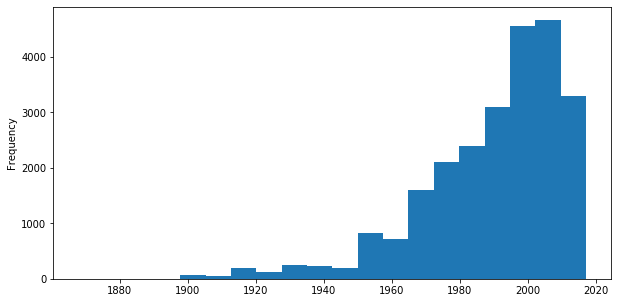

In [34]:
plt.figure(figsize=(10, 5))
perth_train["build_year"].plot.hist(bins=20)

In [35]:
perth_train["build_year"].mean()

1989.6874026080538

In [68]:
perth_train["build_year"].median()

1995.0

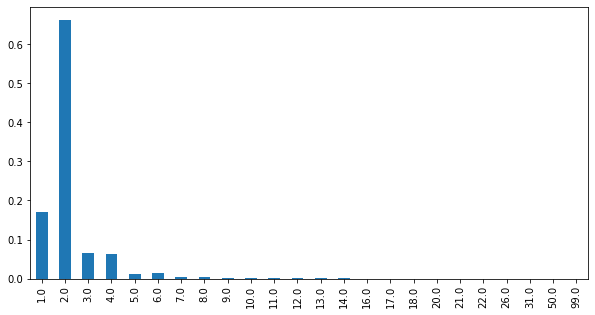

In [36]:
plt.figure(figsize=(10, 5))
perth_train["garage"].value_counts(normalize=True).sort_index().plot.bar();

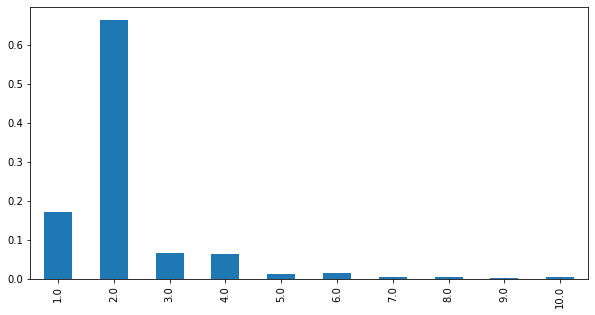

In [37]:
cleaned_garage = perth_train["garage"].copy()
cleaned_garage[cleaned_garage > 10] = 10

plt.figure(figsize=(10, 5))
cleaned_garage.value_counts(normalize=True).sort_index().plot.bar();

In [71]:
cleaned_garage.mode()

0    2.0
dtype: float64

In [39]:
p = cleaned_garage.value_counts(normalize=True).sort_index()
p

1.0     0.170203
2.0     0.663284
3.0     0.065867
4.0     0.062818
5.0     0.011753
6.0     0.014962
7.0     0.003169
8.0     0.004212
9.0     0.000602
10.0    0.003129
Name: garage, dtype: float64

In [40]:
def generate_new_garage_sample():
    return np.random.choice(p.index, p=p.values)

In [67]:
generate_new_garage_sample()

2.0

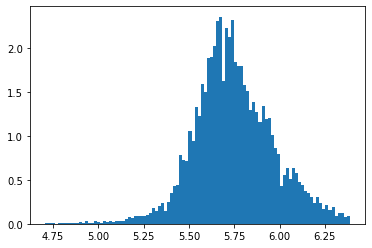

In [69]:
plt.hist(perth['log10_price'], bins=100, density=True);

In [70]:
perth['log10_price'].mean()

5.747606369756005

In [72]:
# Null values in the garage column are houses that have 0 garage spaces
perth_test.fillna({'garage': 0, 'build_year': perth_train['build_year'].mean(), 'nearest_sch_rank': 150}, 
                  inplace=True)
perth_train.fillna({'garage': 0, 'build_year': perth_train['build_year'].mean(), 'nearest_sch_rank': 150}, 
                   inplace=True)

In [83]:
parameters = {'max_depth': np.arange(1, 25),
              'min_samples_leaf': np.arange(1, 50)}

random_search = RandomizedSearchCV(DecisionTreeRegressor(criterion='squared_error', random_state=0), 
                                   parameters, n_iter=10, cv=5, 
                                   scoring='neg_mean_squared_error', random_state=0)
                                   
model = random_search.fit(perth_train.drop(columns='log10_price'), perth_train['log10_price'])

print(random_search.best_params_)

predictions = 10**model.predict(perth_test.drop(columns='log10_price'))
mean_squared_log_error(10**perth_test['log10_price'], predictions, squared=False)

{'min_samples_leaf': 17, 'max_depth': 23}


0.24383778611380308

In [75]:
base_model = DecisionTreeRegressor(criterion='squared_error', max_depth=23)
parameters = {'min_samples_leaf': np.arange(1, 50)}

model = GridSearchCV(base_model, parameters, cv=5, scoring='neg_mean_squared_error')
model.fit(perth_train.drop(columns='log10_price'), perth_train['log10_price'])

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=23),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='neg_mean_squared_error')

In [77]:
model.best_params_

{'min_samples_leaf': 19}

In [78]:
base_model = DecisionTreeRegressor(criterion='squared_error', min_samples_leaf=19)
parameters = {'max_depth': np.arange(1, 25)}

model = GridSearchCV(base_model, parameters, cv=5, scoring='neg_mean_squared_error')
model.fit(perth_train.drop(columns='log10_price'), perth_train['log10_price'])

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(min_samples_leaf=19),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             scoring='neg_mean_squared_error')

In [79]:
model.best_params_

{'max_depth': 19}

In [80]:
final_model = DecisionTreeRegressor(criterion='squared_error', min_samples_leaf=19, max_depth=19)
final_model.fit(perth_train.drop(columns='log10_price'), perth_train['log10_price'])

DecisionTreeRegressor(max_depth=19, min_samples_leaf=19)

In [82]:
predictions = 10**final_model.predict(perth_test.drop(columns='log10_price'))
mean_squared_log_error(10**perth_test['log10_price'], predictions, squared=False)

0.24443345170358263